# **Edge Detection**

Derivative filters are used to solve complex tasks. For example, they are used to detect edges verifying where the gradient is higher than its neighbors.

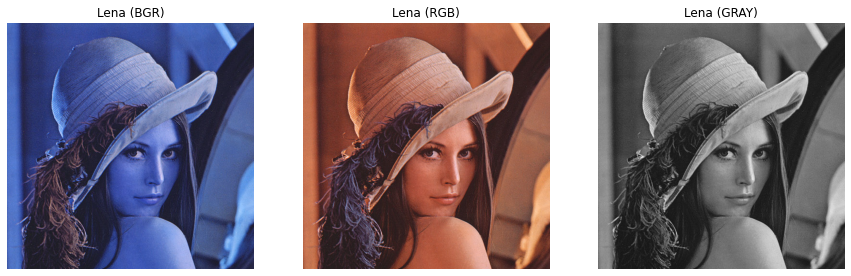

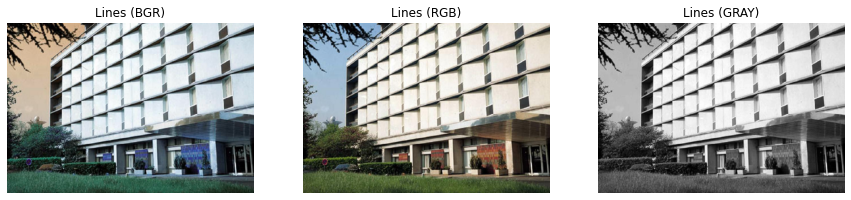

In [2]:
# Import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read images into the workspace
lena = cv2.imread('lena.bmp') # BGR image
lena_rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) # RGB image
lena_gs = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) # GS image

# Read images into the workspace
lines = cv2.imread('lines.jpg') # BGR image
lines_rgb = cv2.cvtColor(lines, cv2.COLOR_BGR2RGB) # RGB image
lines_gs = cv2.cvtColor(lines, cv2.COLOR_BGR2GRAY) # GS image

# Plot rgb/grayscale images
plt.figure(figsize=(15, 12))
plt.subplot(2,3,1), plt.imshow(lena), plt.title('Lena (BGR)'), plt.axis('off')
plt.subplot(2,3,2), plt.imshow(lena_rgb), plt.title('Lena (RGB)'), plt.axis('off')
plt.subplot(2,3,3), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.title('Lena (GRAY)'), plt.axis('off')
plt.show()

# Plot rgb/grayscale images
plt.figure(figsize=(15, 12))
plt.subplot(2,3,1), plt.imshow(lines), plt.title('Lines (BGR)'), plt.axis('off')
plt.subplot(2,3,2), plt.imshow(lines_rgb), plt.title('Lines (RGB)'), plt.axis('off')
plt.subplot(2,3,3), plt.imshow(lines_gs, cmap=plt.cm.gray), plt.title('Lines (GRAY)'), plt.axis('off')
plt.show()

# **Ex. 1 - Derivative Filters**

Define 3x3 horizontal and vertical derivative filters and apply them to both 'Lena' and 'Lines' gray-scale images.

The horizontal filter is as follows:
\begin{bmatrix}
1 & 0 & -1\\
1 & 0 & -1\\
1 & 0 & -1
\end{bmatrix}

The vertical is as follows:
\begin{bmatrix}
1 & 1 & 1 \\
0 & 0 & 0 \\
-1 & -1 & -1
\end{bmatrix}

Tip: when dealing with image derivatives use the maximum image depth (e.g., cv2.CV_64F).

In [23]:
"""
YOUR CODE HERE

lena_derivative_h and lena_derivative_v are the output images after applied the filters to Lena image
lines_derivative_h and lines_derivative_v are the output images after applied the filters to Lines image

Define the 2 filters as filter_h and filter_v
"""

derivative = np.array([1, 0, -1])
filter_h = np.tile(derivative, (3, 1))
filter_v = np.tile(derivative, (3, 1)).T

lena_derivative_h = cv2.filter2D(lena_gs, cv2.CV_64F, filter_h)
lena_derivative_v = cv2.filter2D(lena_gs, cv2.CV_64F, filter_v)
lines_derivative_h = cv2.filter2D(lines_gs, cv2.CV_64F, filter_h)
lines_derivative_v = cv2.filter2D(lines_gs, cv2.CV_64F, filter_v)


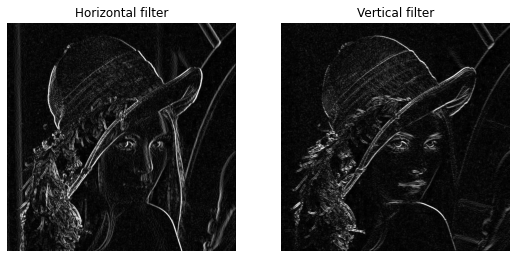

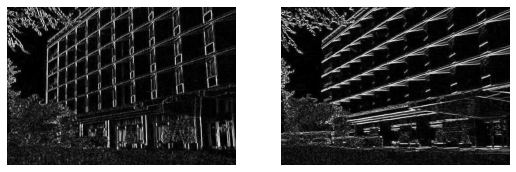

In [24]:
# Plot images
plt.figure(figsize=(9,13))
plt.subplot(1, 2, 1), plt.imshow(cv2.convertScaleAbs(lena_derivative_h), cmap=plt.cm.gray), plt.title("Horizontal filter"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(cv2.convertScaleAbs(lena_derivative_v), cmap=plt.cm.gray), plt.title("Vertical filter"),  plt.axis('off')
plt.show()

plt.figure(figsize=(9,13))
plt.subplot(1, 2, 1), plt.imshow(cv2.convertScaleAbs(lines_derivative_h), cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(cv2.convertScaleAbs(lines_derivative_v), cmap=plt.cm.gray), plt.axis('off')
plt.show()

# **Noise effect**

The 2D derivative filters are not resistant to the noise. Let's try to visualize it.

In [11]:
def salt_pepper_noise(image, ratio, amount):
  '''
    Simulate salt&pepper noise for an input grayscale image.
    
    Input Parameters
    ----------------
    image: np.array
      Input image
    ratio: float between 0 and 1
      Salt and pepper noise ratio.
    amount:  float between 0 and 1
      Amount of noise.

    Output parameter
    ----------------
    image: np.array
  '''
  
  # Check input parameters
  assert len(image.shape) == 2, f"Input image has {image.shape[-1]} channels. \
                                  Grayscale image is required."
  assert 0. <= ratio <= 1., "Ratio parameter must be between 0 and 1."
  assert 0. <= amount <= 1., "Amount parameter must be between 0 and 1."
  
  # Extract image dimensions
  row, col = image.shape
  output = np.copy(image)
  
  # Apply salt noise to each pixel individually
  num_salt = np.ceil(amount * image.size * ratio)
  coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
  for i in zip(coords[0], coords[1]):
    output[i] = 255 # set to salt value

  # Apply pepper noise to each pixel individually
  num_pepper = np.ceil(amount * image.size * (1. - ratio))
  coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
  for i in zip(coords[0], coords[1]):
    output[i] = 0 # set to pepper value

  return output

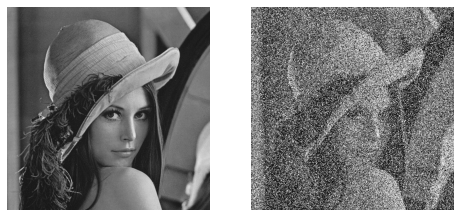

In [12]:
lena_salt_pepper = salt_pepper_noise(lena_gs, 0.6, 0.55)
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(lena_salt_pepper, cmap=plt.cm.gray), plt.axis('off')
plt.show()

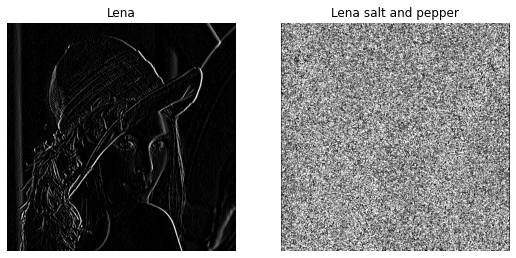

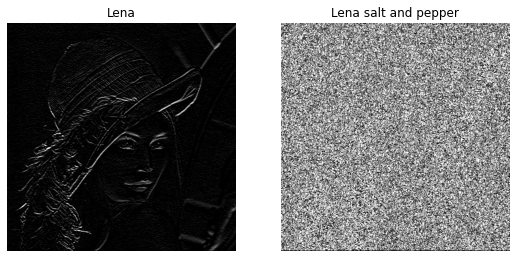

In [13]:
# Lena
lena_noise_h = cv2.filter2D(lena_salt_pepper, cv2.CV_64F, filter_h)
lena_noise_v = cv2.filter2D(lena_salt_pepper, cv2.CV_64F, filter_v)

# Plot lena and lena with noise using the horizontal filter
plt.figure(figsize=(9,13))
plt.subplot(1, 2, 1), plt.imshow(cv2.convertScaleAbs(lena_derivative_h), cmap=plt.cm.gray), plt.title("Lena"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(cv2.convertScaleAbs(lena_noise_h), cmap=plt.cm.gray), plt.title("Lena salt and pepper"),  plt.axis('off')
plt.show()

# Plot lena and lena with noise using the vertical filter
plt.figure(figsize=(9,13))
plt.subplot(1, 2, 1), plt.imshow(cv2.convertScaleAbs(lena_derivative_v), cmap=plt.cm.gray), plt.title("Lena"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(cv2.convertScaleAbs(lena_noise_v), cmap=plt.cm.gray), plt.title("Lena salt and pepper"),  plt.axis('off')
plt.show()

# **Ex. 2 - Derivative of Gaussian filter**

Implement a function for creating the derivative of a Gaussian filter along the x and y directions. 

\begin{equation}
g(x,y;\sigma) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}~~~~~
g_x(x,y;\sigma) = -\frac{x}{2\pi\sigma^4}e^{-\frac{x^2+y^2}{2\sigma^2}}~~~~~
g_x(x,y;\sigma) = -\frac{y}{2\pi\sigma^4}e^{-\frac{x^2+y^2}{2\sigma^2}}
\end{equation}

In [14]:
def d_gaussian_2d(size=11, sigma=1):
    """
    2-D Gaussian Derivative Filters

    Input Parameters
    ----------------
    size: int
      Size of the squared kernel 
    sigma: float
      Standard deviation

    Output Parameters
    ----------------
    kernel_x: np.array
    kernel_y: np.array
      2-D Derivative Gaussian Filter
    """

    xaxis = range(-int((size-1)/2), int((size+1)/2), 1)

    xv, yv = np.meshgrid(xaxis, xaxis)
    kernel_x = -xv*np.exp(-(xv**2+yv**2)/(2*sigma**2))/(2*np.pi*sigma**4)
    kernel_y = -yv*np.exp(-(xv**2+yv**2)/(2*sigma**2))/(2*np.pi*sigma**4)

    return kernel_x, kernel_y

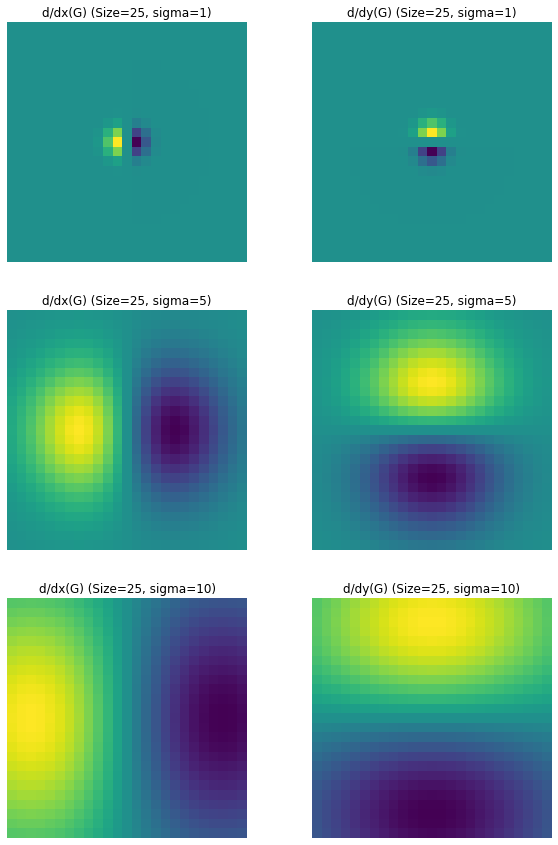

In [15]:
# Create 2-d Derivative Gaussian Filters with different sigma parameters
g_x_1, g_y_1 = d_gaussian_2d(size=25, sigma=1)
g_x_5, g_y_5 = d_gaussian_2d(size=25, sigma=5)
g_x_10, g_y_10 = d_gaussian_2d(size=25, sigma=10)

plt.figure(figsize=(10,15))
plt.subplot(3,2,1),plt.imshow(g_x_1), plt.title('d/dx(G) (Size=25, sigma=1)'), plt.axis('off')
plt.subplot(3,2,2), plt.imshow(g_y_1), plt.title('d/dy(G) (Size=25, sigma=1)'), plt.axis('off')
plt.subplot(3,2,3),plt.imshow(g_x_5), plt.title('d/dx(G) (Size=25, sigma=5)'), plt.axis('off')
plt.subplot(3,2,4), plt.imshow(g_y_5), plt.title('d/dy(G) (Size=25, sigma=5)'), plt.axis('off')
plt.subplot(3,2,5),plt.imshow(g_x_10), plt.title('d/dx(G) (Size=25, sigma=10)'), plt.axis('off')
plt.subplot(3,2,6), plt.imshow(g_y_10), plt.title('d/dy(G) (Size=25, sigma=10)'), plt.axis('off')
plt.show()

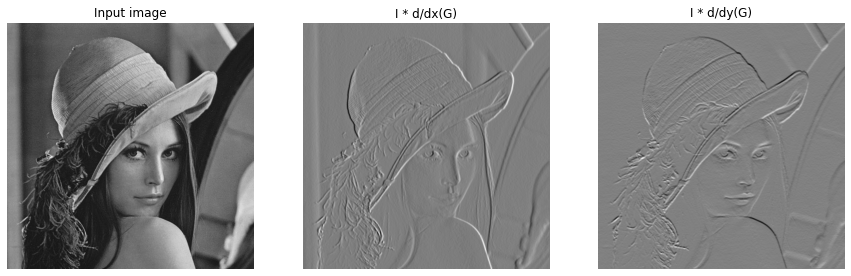

In [16]:
# Apply the previous filter to Lena image
lena_gx = cv2.filter2D(lena_gs, cv2.CV_64F, g_x_1)
lena_gy = cv2.filter2D(lena_gs, cv2.CV_64F, g_y_1)

# Display results
plt.figure(figsize=(15,20))
plt.subplot(1,3,1), plt.imshow(lena_gs, cmap=plt.cm.gray), plt.title('Input image'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(lena_gx, cmap=plt.cm.gray), plt.title('I * d/dx(G)'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(lena_gy, cmap=plt.cm.gray), plt.title('I * d/dy(G)'), plt.axis('off')
plt.show()

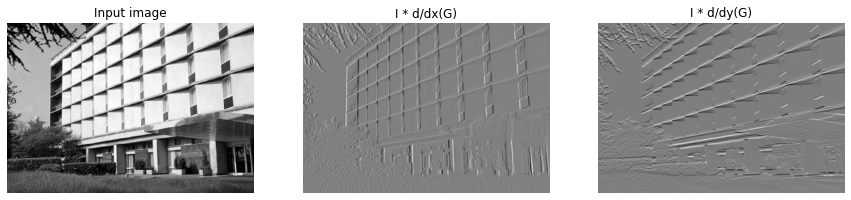

In [17]:
lines_gx = cv2.filter2D(lines_gs, cv2.CV_64F, g_x_1)
lines_gy = cv2.filter2D(lines_gs, cv2.CV_64F, g_y_1)

# Display results
plt.figure(figsize=(15,20))
plt.subplot(1,3,1), plt.imshow(lines_gs, cmap=plt.cm.gray), plt.title('Input image'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(lines_gx, cmap=plt.cm.gray), plt.title('I * d/dx(G)'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(lines_gy, cmap=plt.cm.gray), plt.title('I * d/dy(G)'), plt.axis('off')
plt.show()

Let us apply this filter to the salt and pepper images, to see how it deals with noise. In this case the filter should be resistent to noise. 

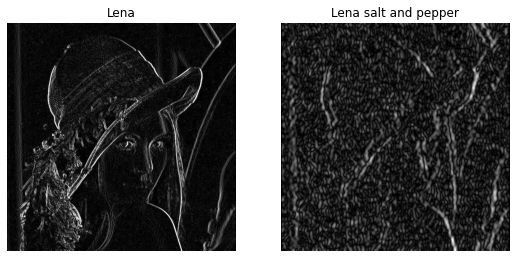

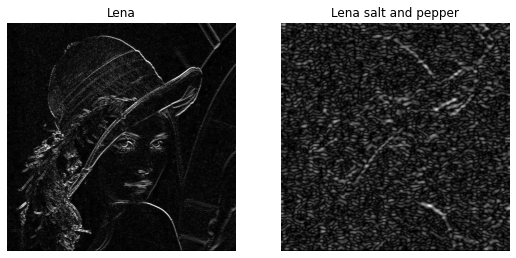

In [29]:
filter_1,  filter_2 =  d_gaussian_2d(size=21, sigma=3)

# Lena
lena_noise_h = cv2.filter2D(lena_salt_pepper, cv2.CV_64F, filter_1)
lena_noise_v = cv2.filter2D(lena_salt_pepper, cv2.CV_64F, filter_2)

# Plot lena and lena with noise using the horizontal filter
plt.figure(figsize=(9,13))
plt.subplot(1, 2, 1), plt.imshow(cv2.convertScaleAbs(lena_derivative_h), cmap=plt.cm.gray), plt.title("Lena"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(cv2.convertScaleAbs(lena_noise_h), cmap=plt.cm.gray), plt.title("Lena salt and pepper"),  plt.axis('off')
plt.show()

# Plot lena and lena with noise using the vertical filter
plt.figure(figsize=(9,13))
plt.subplot(1, 2, 1), plt.imshow(cv2.convertScaleAbs(lena_derivative_v), cmap=plt.cm.gray), plt.title("Lena"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(cv2.convertScaleAbs(lena_noise_v), cmap=plt.cm.gray), plt.title("Lena salt and pepper"),  plt.axis('off')
plt.show()

# **Scale of Gaussian derivative filter**

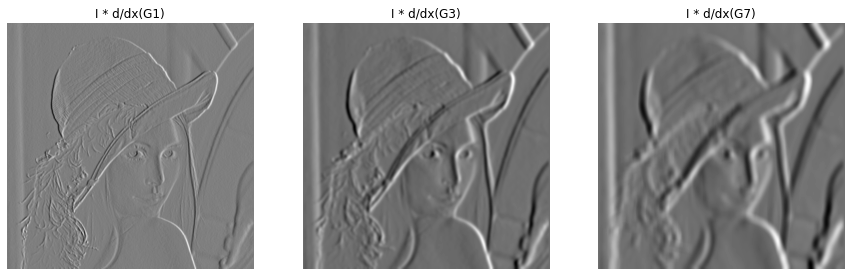

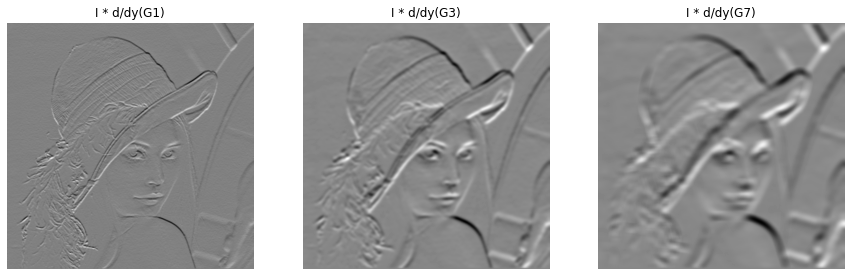

In [18]:
g_x_1, g_y_1 = d_gaussian_2d(size=21, sigma=1)
g_x_3, g_y_3 = d_gaussian_2d(size=21, sigma=3)
g_x_7, g_y_7 = d_gaussian_2d(size=21, sigma=7)


lena_gx_1 = cv2.filter2D(lena_gs, cv2.CV_64F, g_x_1)
lena_gx_3 = cv2.filter2D(lena_gs, cv2.CV_64F, g_x_3)
lena_gx_7 = cv2.filter2D(lena_gs, cv2.CV_64F, g_x_7)
lena_gy_1 = cv2.filter2D(lena_gs, cv2.CV_64F, g_y_1)
lena_gy_3 = cv2.filter2D(lena_gs, cv2.CV_64F, g_y_3)
lena_gy_7 = cv2.filter2D(lena_gs, cv2.CV_64F, g_y_7)

# Display results
plt.figure(figsize=(15,20))
plt.subplot(1,3,1), plt.imshow(lena_gx_1, cmap=plt.cm.gray), plt.title('I * d/dx(G1)'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(lena_gx_3, cmap=plt.cm.gray), plt.title('I * d/dx(G3)'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(lena_gx_7, cmap=plt.cm.gray), plt.title('I * d/dx(G7)'), plt.axis('off')
plt.show()

plt.figure(figsize=(15,20))
plt.subplot(1,3,1), plt.imshow(lena_gy_1, cmap=plt.cm.gray), plt.title('I * d/dy(G1)'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(lena_gy_3, cmap=plt.cm.gray), plt.title('I * d/dy(G3)'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(lena_gy_7, cmap=plt.cm.gray), plt.title('I * d/dy(G7)'), plt.axis('off')
plt.show()

It is possible to see the effect of sigma also on the noisy image, subject to salt and pepper noise. Let us visualize it.

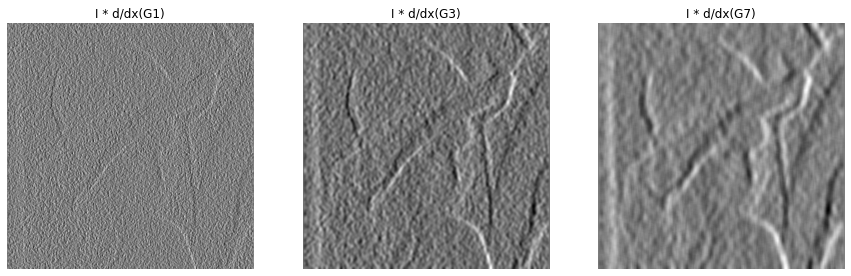

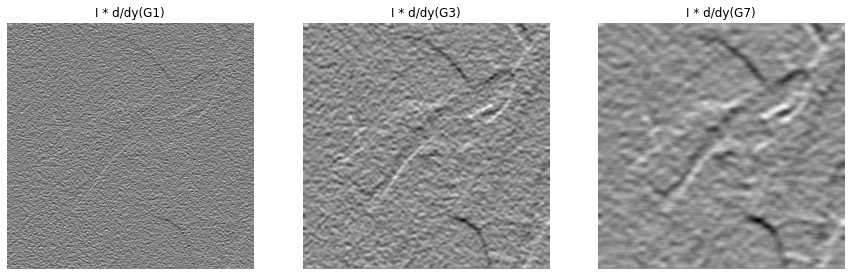

In [30]:
lena_gx_1 = cv2.filter2D(lena_salt_pepper, cv2.CV_64F, g_x_1)
lena_gx_3 = cv2.filter2D(lena_salt_pepper, cv2.CV_64F, g_x_3)
lena_gx_7 = cv2.filter2D(lena_salt_pepper, cv2.CV_64F, g_x_7)
lena_gy_1 = cv2.filter2D(lena_salt_pepper, cv2.CV_64F, g_y_1)
lena_gy_3 = cv2.filter2D(lena_salt_pepper, cv2.CV_64F, g_y_3)
lena_gy_7 = cv2.filter2D(lena_salt_pepper, cv2.CV_64F, g_y_7)

# Display results
plt.figure(figsize=(15,20))
plt.subplot(1,3,1), plt.imshow(lena_gx_1, cmap=plt.cm.gray), plt.title('I * d/dx(G1)'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(lena_gx_3, cmap=plt.cm.gray), plt.title('I * d/dx(G3)'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(lena_gx_7, cmap=plt.cm.gray), plt.title('I * d/dx(G7)'), plt.axis('off')
plt.show()

plt.figure(figsize=(15,20))
plt.subplot(1,3,1), plt.imshow(lena_gy_1, cmap=plt.cm.gray), plt.title('I * d/dy(G1)'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(lena_gy_3, cmap=plt.cm.gray), plt.title('I * d/dy(G3)'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(lena_gy_7, cmap=plt.cm.gray), plt.title('I * d/dy(G7)'), plt.axis('off')
plt.show()